In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import json
players_mlb = {}
with open("../Data/mlb_players.json", 'r') as json_file:
    players_mlb:dict = json.load(json_file)

In [8]:
all_pitchers = {k:players_mlb[k] for k in players_mlb.keys() if players_mlb[k]["Player type"]==1}

In [5]:
def pitcher_seasson_avg_Calc(stat, games_plus_games_started, seasson_factor=68,r=0):
    player_factor = games_plus_games_started/seasson_factor
    return round((stat/player_factor),r)

In [10]:
pitcher_in_hall= {k:all_pitchers[k] for k in all_pitchers.keys() if  all_pitchers[k]['HoF']}
pitchers_more_2_seassons= {k:all_pitchers[k] for k in all_pitchers.keys() if  all_pitchers[k]['total_seasons']>2}

In [12]:
print(len(all_pitchers))
print(len(pitchers_more_2_seassons))

9707
5365


In [21]:
def pit_stat_comparision(groups, stat, labels, title, avg=False):
    g = []
    problems_count = 0
    zero_games_count = 0
    for group in groups:
        g1 = []
        for k in group.keys():
            p_stats = group[k]["pitcher_stats"]
            not_ok = isinstance(p_stats[stat]['summary'], str)
            if not_ok:
                problems_count+=1
                continue
            if avg:
                if p_stats.get('G') == None or p_stats.get('GS') == None:
                    print(group[k])
                games = p_stats['G']["summary"]+p_stats['GS']["summary"]
                if games == 0:
                    zero_games_count+=1
                    continue
                g1.append(pitcher_seasson_avg_Calc(p_stats[stat]['summary'], games))
            else:
                g1.append(p_stats[stat]['summary'])
        g.append(g1)
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    meanlineprops = dict(linestyle='--', linewidth=1, color='yellow')
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.boxplot(g,vert=True, medianprops=medianprops, meanprops=meanlineprops, meanline=True, showmeans=True, patch_artist=True,labels=labels)
    fig.suptitle(title)
    ax1.yaxis.grid(True)
    print(f"Number of players with not stats in {stat}:{problems_count}")
    print(f"Number of players zero games(played):{zero_games_count}")
    plt.show()

Number of players with not stats in W:0
Number of players zero games(played):5


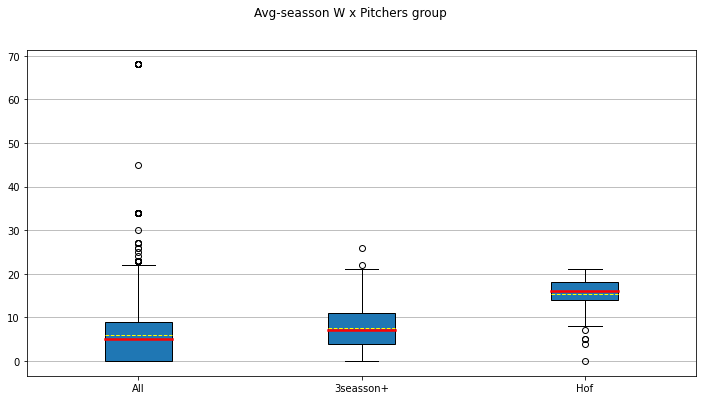

In [55]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "W", ['All', '3seasson+', 'Hof'], "Avg-seasson W x Pitchers group", True)

Number of players with not stats in L:0
Number of players zero games(played):5


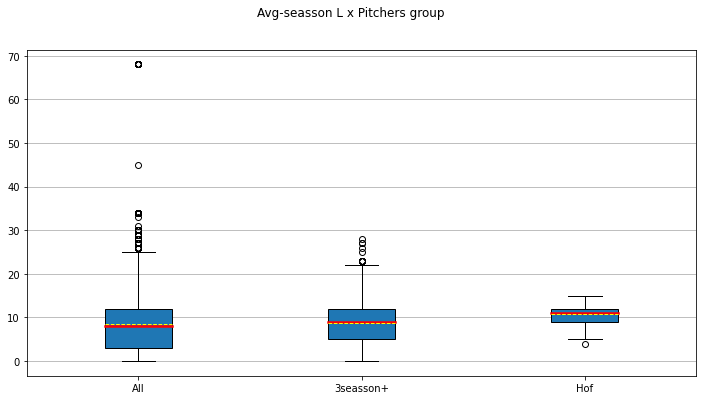

In [54]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "L", ['All', '3seasson+', 'Hof'], "Avg-seasson L x Pitchers group", True)

Number of players with not stats in ERA:37
Number of players zero games(played):0


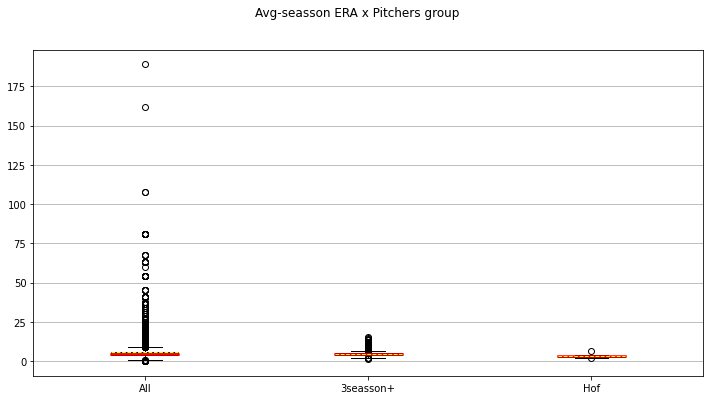

Number of players with not stats in ERA:0
Number of players zero games(played):0


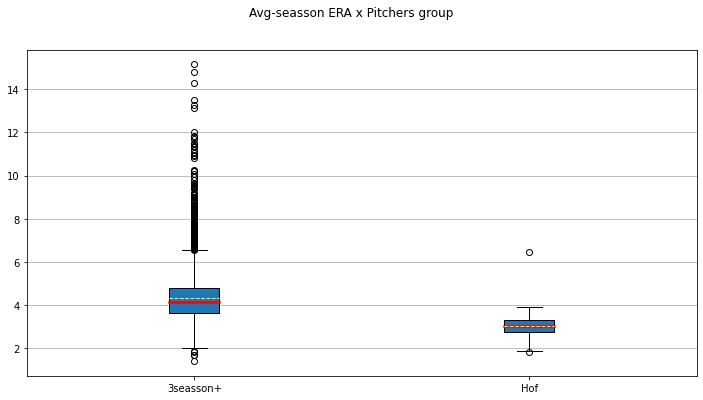

In [53]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "ERA", ['All', '3seasson+', 'Hof'], "Avg-seasson ERA x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "ERA", ['3seasson+', 'Hof'], "Avg-seasson ERA x Pitchers group")


Number of players with not stats in ERA+:236
Number of players zero games(played):0


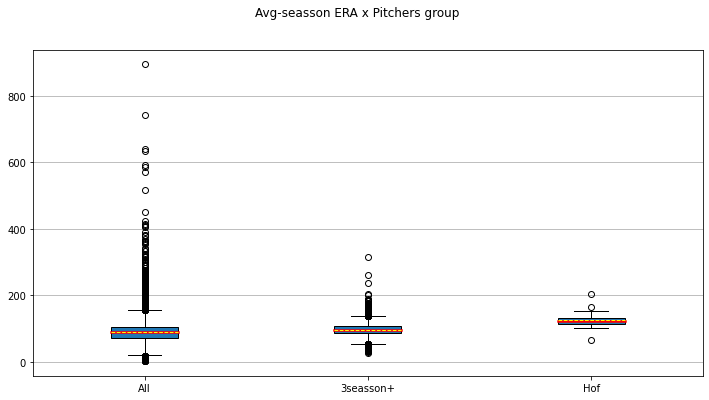

Number of players with not stats in ERA+:0
Number of players zero games(played):0


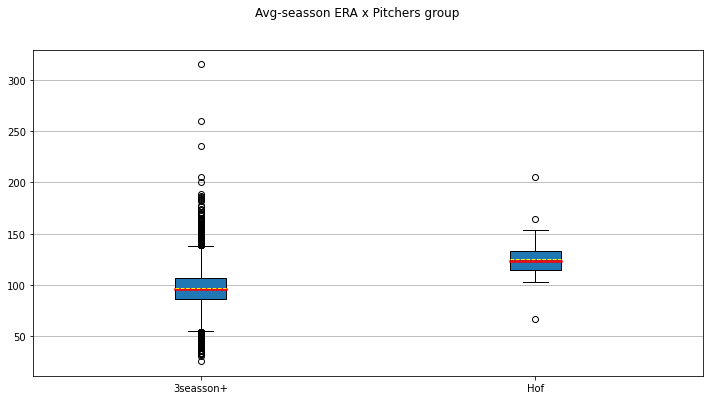

In [57]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "ERA+", ['All', '3seasson+', 'Hof'], "Avg-seasson ERA x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "ERA+", ['3seasson+', 'Hof'], "Avg-seasson ERA x Pitchers group")

Number of players with not stats in G:0
Number of players zero games(played):0


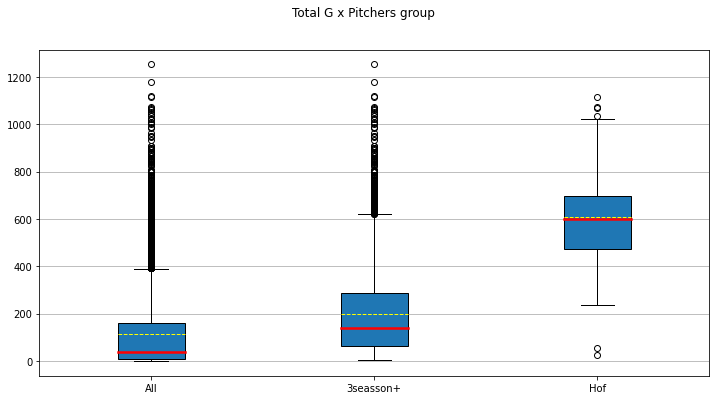

In [58]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "G", ['All', '3seasson+', 'Hof'], "Total G x Pitchers group")

Number of players with not stats in GS:0
Number of players zero games(played):0


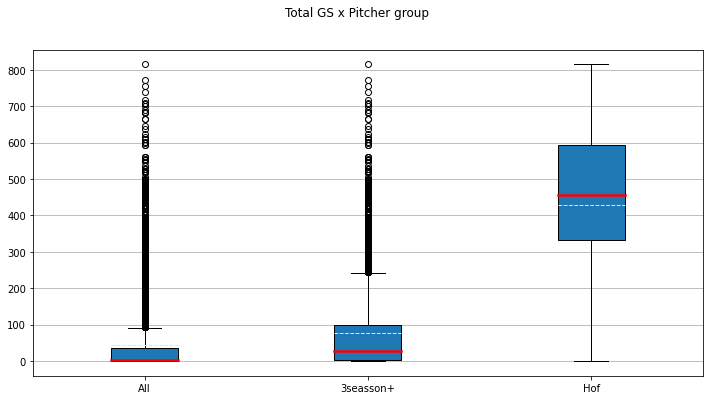

In [59]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "GS", ['All', '3seasson+', 'Hof'], "Total GS x Pitcher group")


Number of players with not stats in SV:0
Number of players zero games(played):5


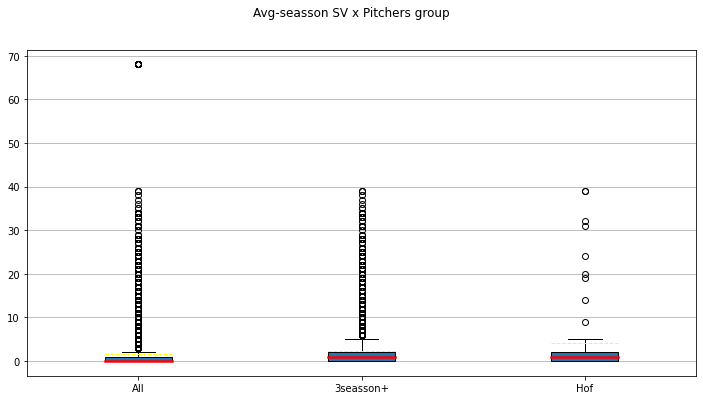

Number of players with not stats in SV:0
Number of players zero games(played):0


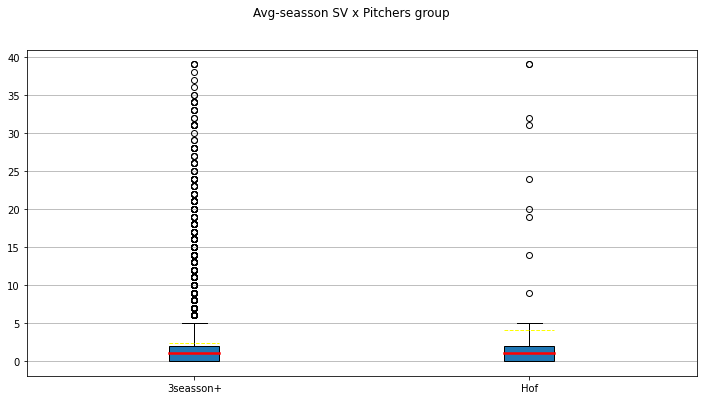

In [60]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "SV", ['All', '3seasson+', 'Hof'], "Avg-seasson SV x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "SV", ['3seasson+', 'Hof'], "Avg-seasson SV x Pitchers group", True)


Number of players with not stats in IP:0
Number of players zero games(played):5


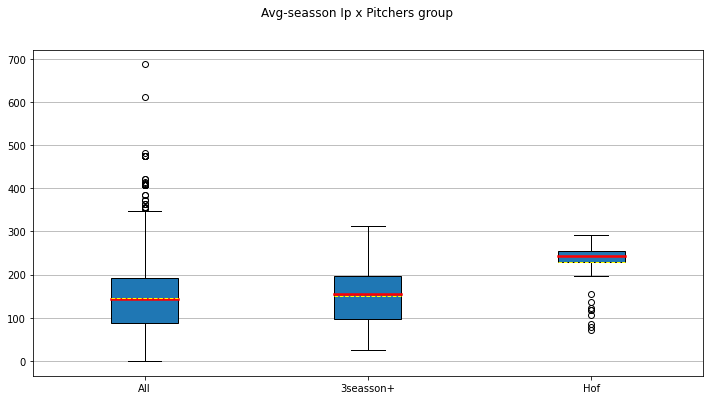

In [62]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "IP", ['All', '3seasson+', 'Hof'], "Avg-seasson Ip x Pitchers group", True)


Number of players with not stats in H:0
Number of players zero games(played):5


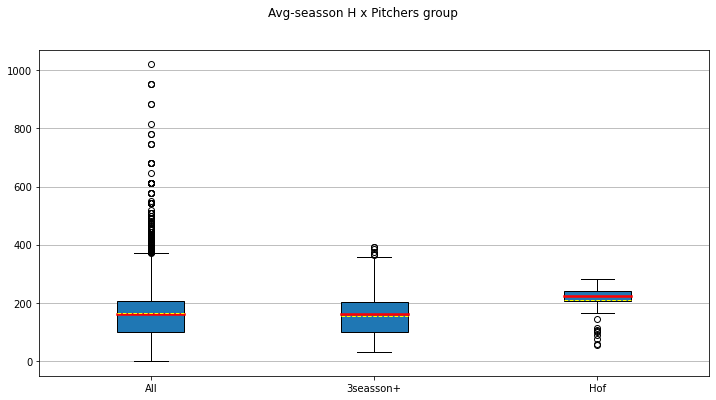

In [63]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "H", ['All', '3seasson+', 'Hof'], "Avg-seasson H x Pitchers group", True)


Number of players with not stats in HR:96
Number of players zero games(played):5


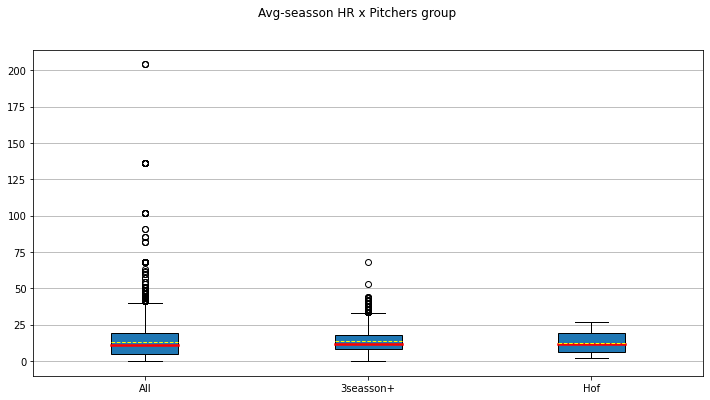

In [65]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "HR", ['All', '3seasson+', 'Hof'], "Avg-seasson HR x Pitchers group", True)


Number of players with not stats in BB:0
Number of players zero games(played):5


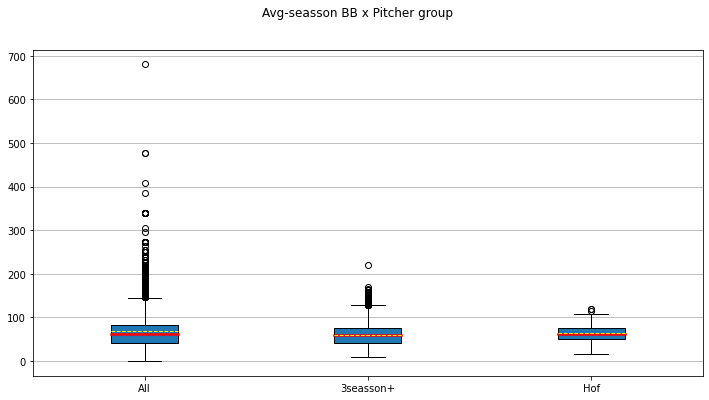

In [34]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "BB", ['All', '3seasson+', 'Hof'], "Avg-seasson BB x Pitchers group", True)


Number of players with not stats in SO:0
Number of players zero games(played):5


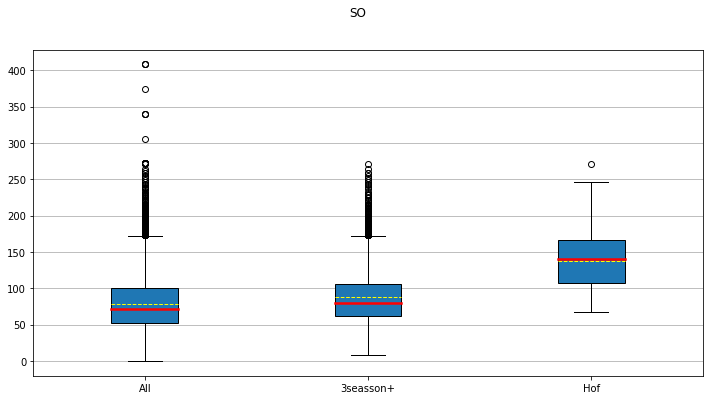

In [66]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "SO", ['All', '3seasson+', 'Hof'], "SO", True)


Number of players with not stats in HBP:58
Number of players zero games(played):5


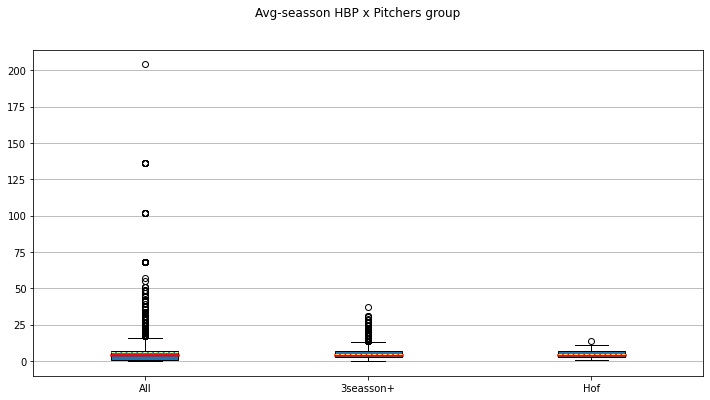

Number of players with not stats in HBP:1
Number of players zero games(played):0


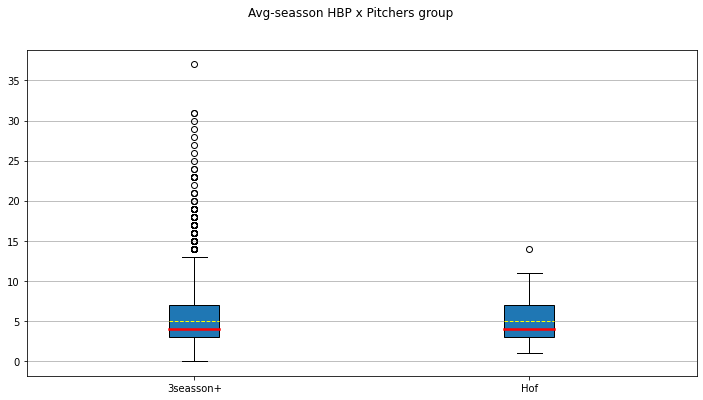

In [68]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "HBP", ['All', '3seasson+', 'Hof'], "Avg-seasson HBP x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "HBP", ['3seasson+', 'Hof'], "Avg-seasson HBP x Pitchers group", True)


Number of players with not stats in R:0
Number of players zero games(played):5


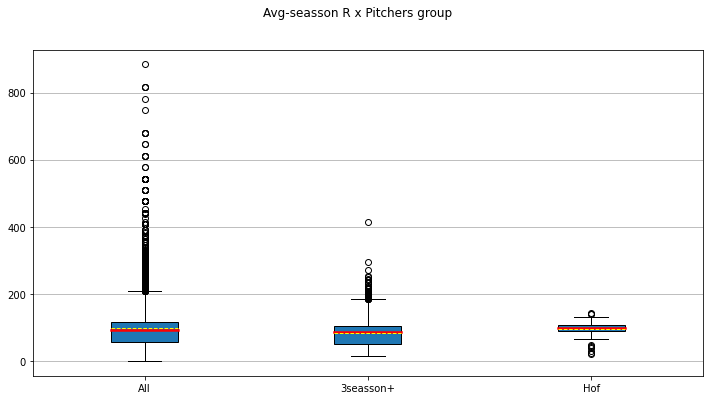

Number of players with not stats in R:0
Number of players zero games(played):0


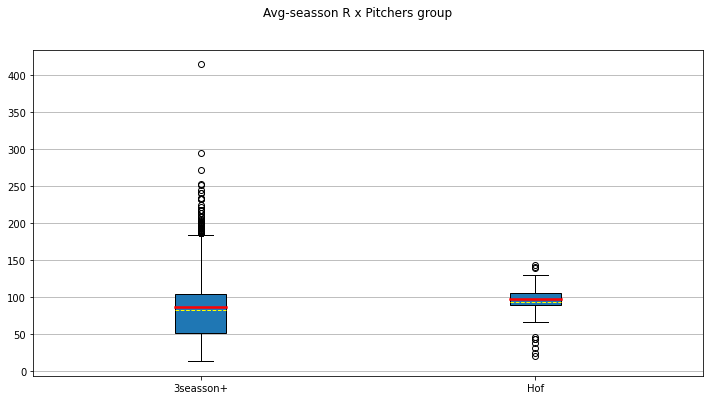

In [70]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "R", ['All', '3seasson+', 'Hof'], "Avg-seasson R x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "R", ['3seasson+', 'Hof'], "Avg-seasson R x Pitchers group", True)


Number of players with not stats in ER:0
Number of players zero games(played):5


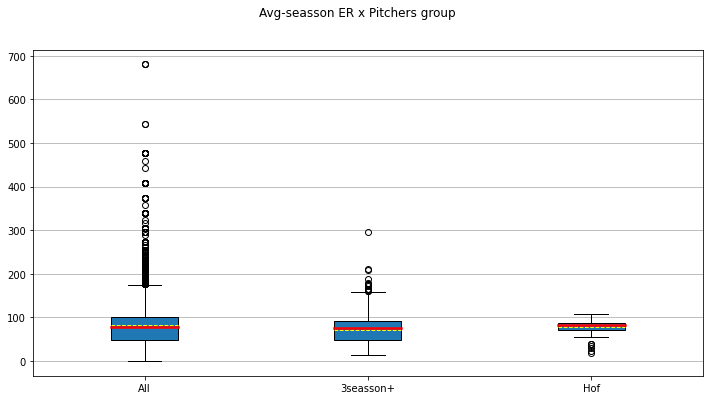

Number of players with not stats in ER:0
Number of players zero games(played):0


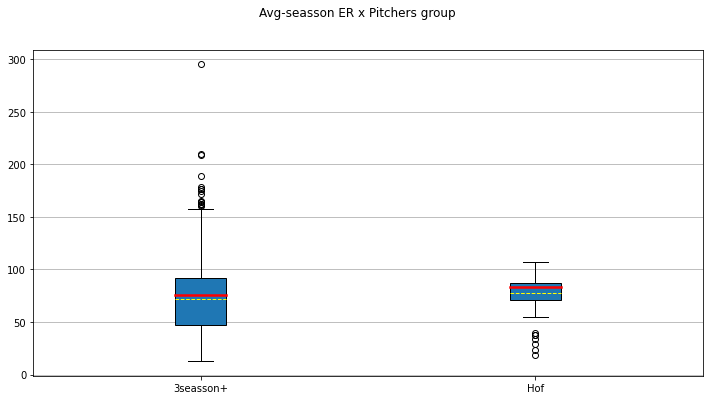

In [71]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "ER", ['All', '3seasson+', 'Hof'], "Avg-seasson ER x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "ER", ['3seasson+', 'Hof'], "Avg-seasson ER x Pitchers group", True)


Number of players with not stats in FIP:130
Number of players zero games(played):0


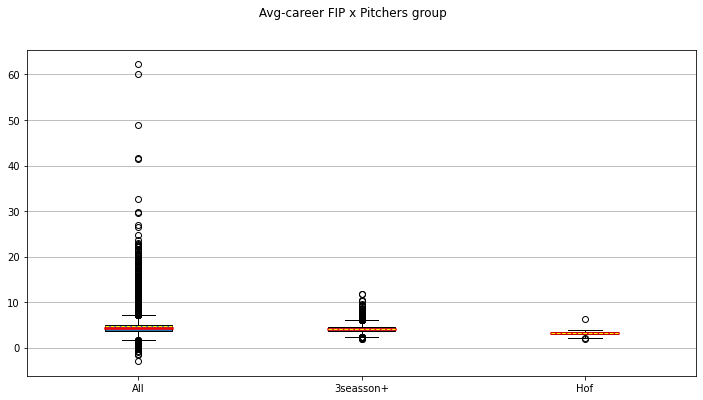

Number of players with not stats in FIP:0
Number of players zero games(played):0


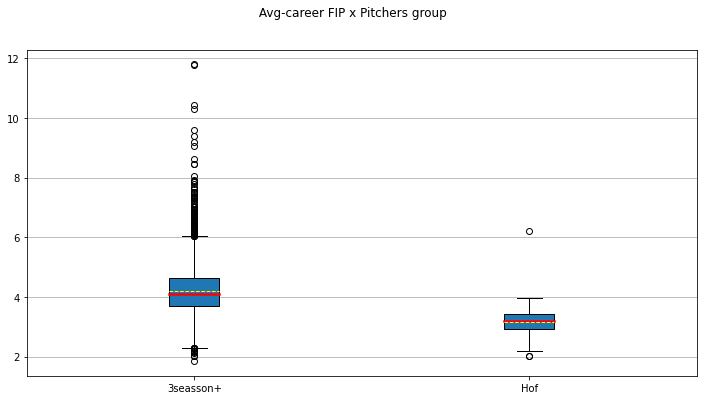

In [73]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "FIP", ['All', '3seasson+', 'Hof'], " Avg-career FIP x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "FIP", ['3seasson+', 'Hof'], " Avg-career FIP x Pitchers group")


Number of players with not stats in WHIP:37
Number of players zero games(played):0


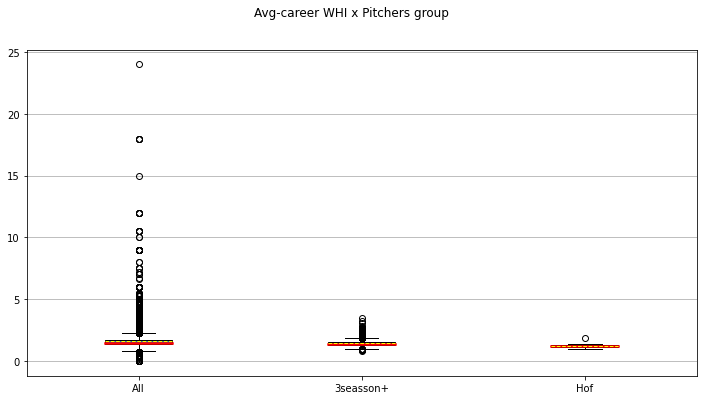

Number of players with not stats in WHIP:0
Number of players zero games(played):0


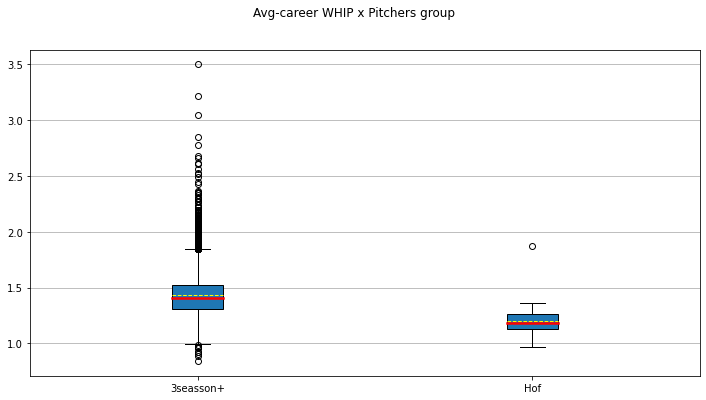

In [74]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "WHIP", ['All', '3seasson+', 'Hof'], "Avg-career WHI x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "WHIP", ['3seasson+', 'Hof'], "Avg-career WHIP x Pitchers group")


Number of players with not stats in RAA:0
Number of players zero games(played):5


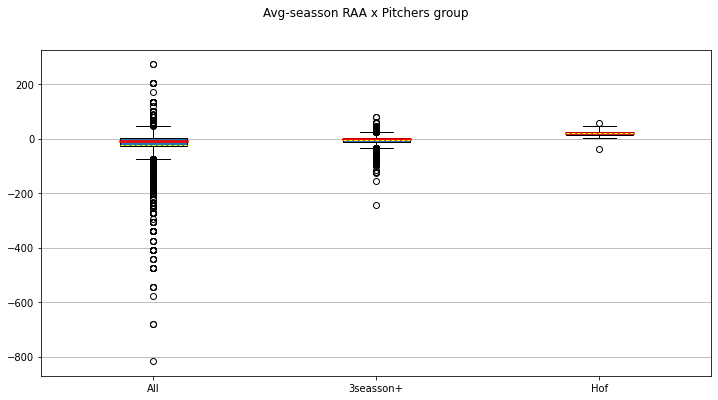

Number of players with not stats in RAA:0
Number of players zero games(played):0


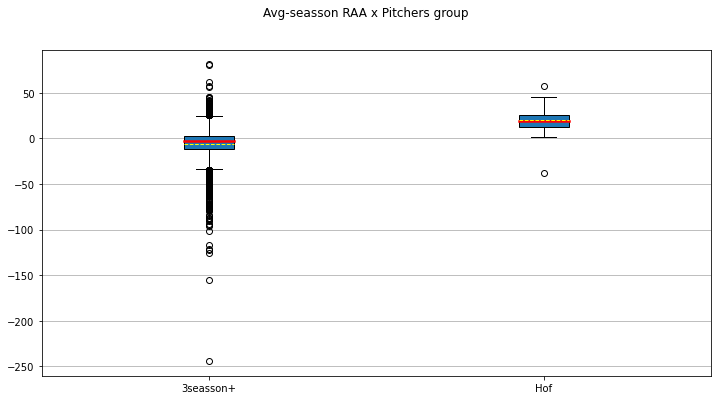

In [78]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "RAA", ['All', '3seasson+', 'Hof'], "Avg-seasson RAA x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "RAA", ['3seasson+', 'Hof'], "Avg-seasson RAA x Pitchers group", True)


Number of players with not stats in RAR:0
Number of players zero games(played):5


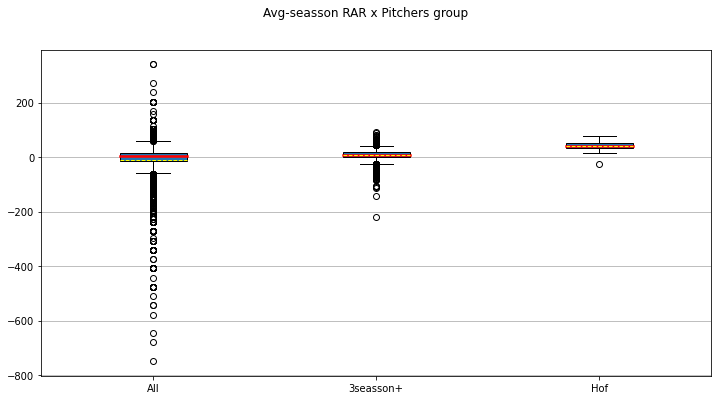

Number of players with not stats in RAR:0
Number of players zero games(played):0


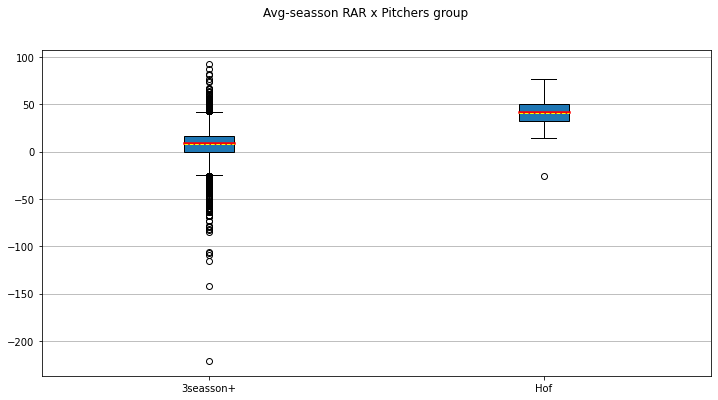

In [79]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "RAR", ['All', '3seasson+', 'Hof'], "Avg-seasson RAR x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "RAR", ['3seasson+', 'Hof'], "Avg-seasson RAR x Pitchers group", True)



Number of players with not stats in WAR:5
Number of players zero games(played):0


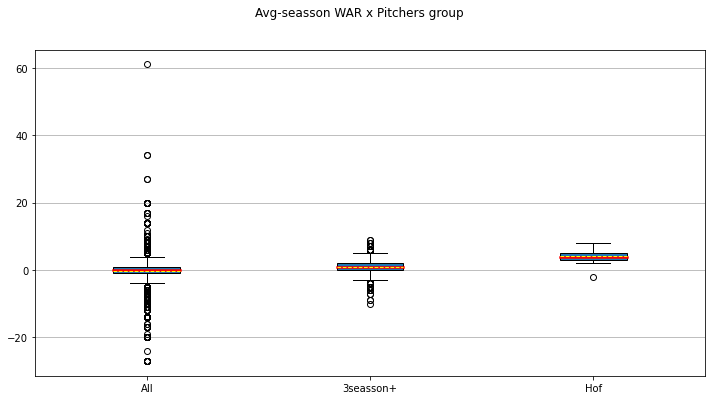

Number of players with not stats in WAR:0
Number of players zero games(played):0


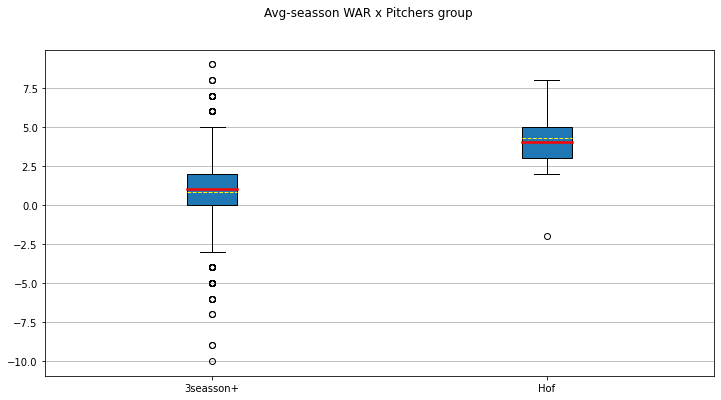

In [80]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "WAR", ['All', '3seasson+', 'Hof'], "Avg-seasson WAR x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "WAR", ['3seasson+', 'Hof'], "Avg-seasson WAR x Pitchers group", True)


Number of players with not stats in WAA:5
Number of players zero games(played):0


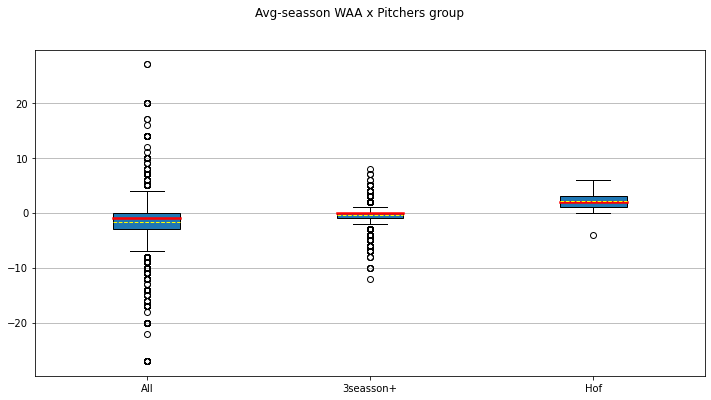

Number of players with not stats in WAA:0
Number of players zero games(played):0


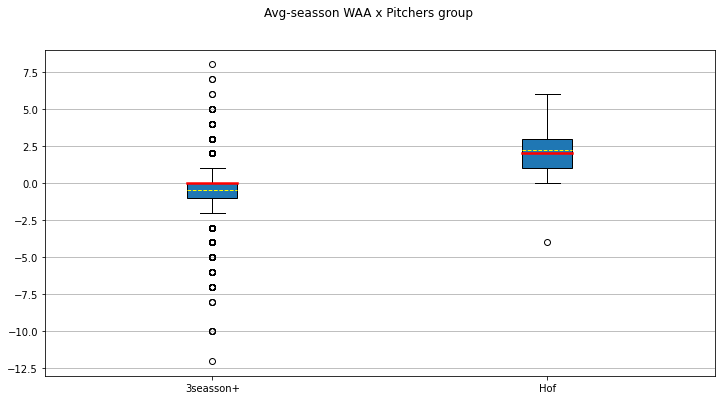

In [81]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "WAA", ['All', '3seasson+', 'Hof'], "Avg-seasson WAA x Pitchers group", True)
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "WAA", ['3seasson+', 'Hof'], "Avg-seasson WAA x Pitchers group", True)


Number of players with not stats in BK:368
Number of players zero games(played):5


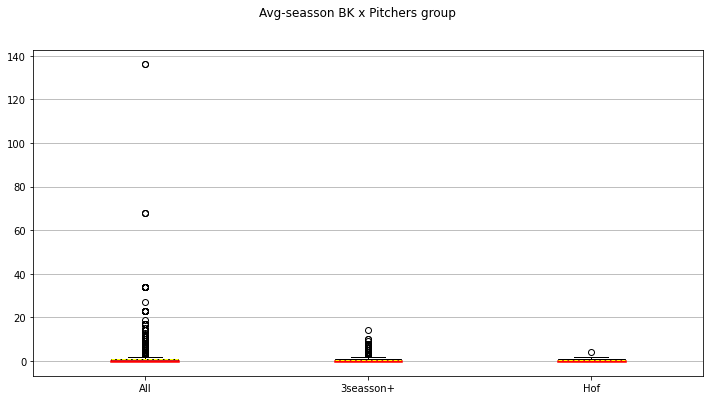

In [82]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "BK", ['All', '3seasson+', 'Hof'], "Avg-seasson BK x Pitchers group", True)


Number of players with not stats in WP:9
Number of players zero games(played):5


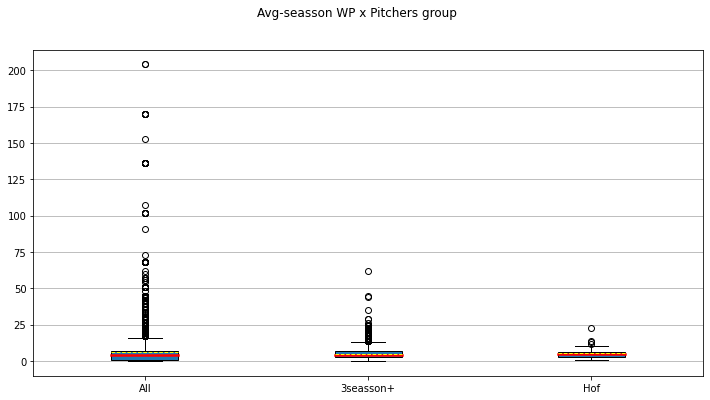

In [83]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "WP", ['All', '3seasson+', 'Hof'], "Avg-seasson WP x Pitchers group", True)


Number of players with not stats in H9:37
Number of players zero games(played):0


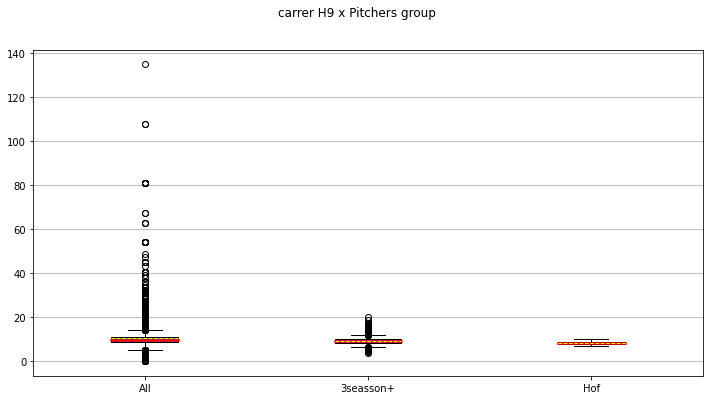

Number of players with not stats in H9:0
Number of players zero games(played):0


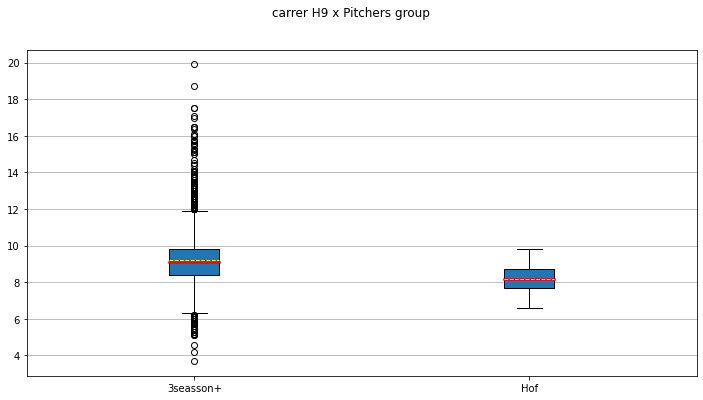

In [85]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "H9", ['All', '3seasson+', 'Hof'], "carrer H9 x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "H9", ['3seasson+', 'Hof'], "carrer H9 x Pitchers group")


Number of players with not stats in HR9:130
Number of players zero games(played):0


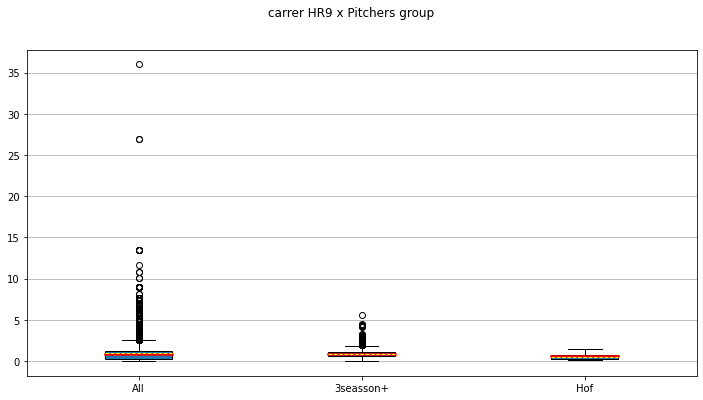

Number of players with not stats in HR9:0
Number of players zero games(played):0


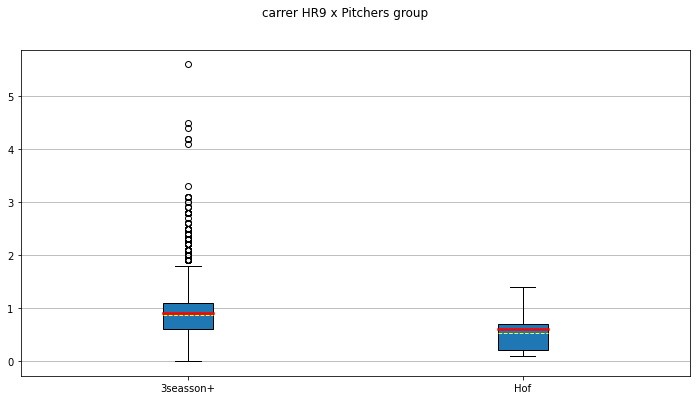

In [86]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "HR9", ['All', '3seasson+', 'Hof'], "carrer HR9 x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "HR9", ['3seasson+', 'Hof'], "carrer HR9 x Pitchers group")


Number of players with not stats in BB9:37
Number of players zero games(played):0


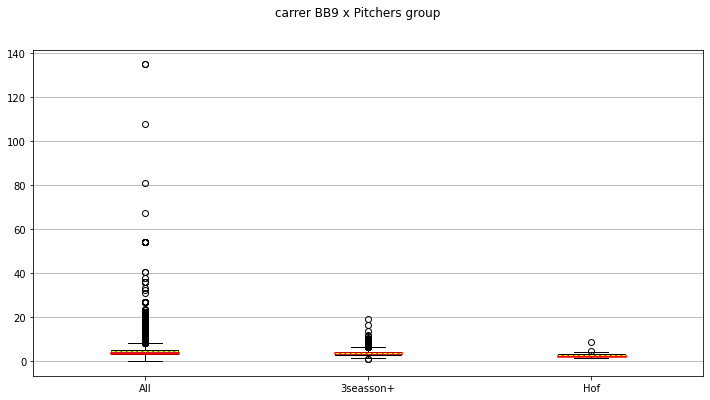

Number of players with not stats in BB9:0
Number of players zero games(played):0


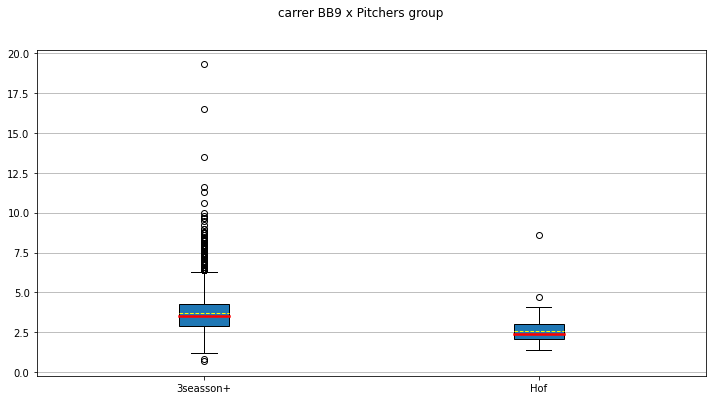

In [89]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "BB9", ['All', '3seasson+', 'Hof'], "carrer BB9 x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "BB9", ['3seasson+', 'Hof'], "carrer BB9 x Pitchers group")


Number of players with not stats in SO9:37
Number of players zero games(played):0


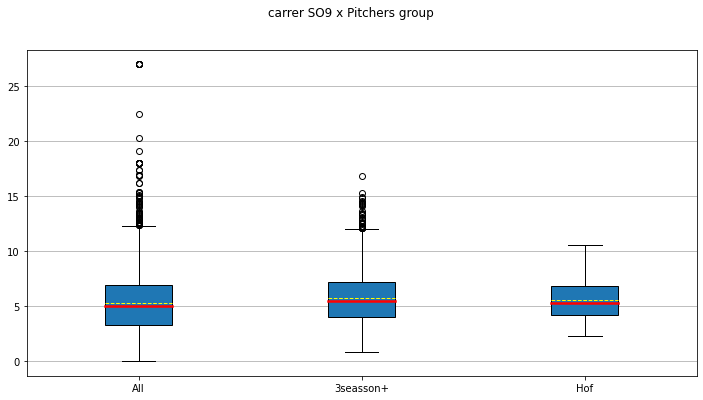

Number of players with not stats in SO9:0
Number of players zero games(played):0


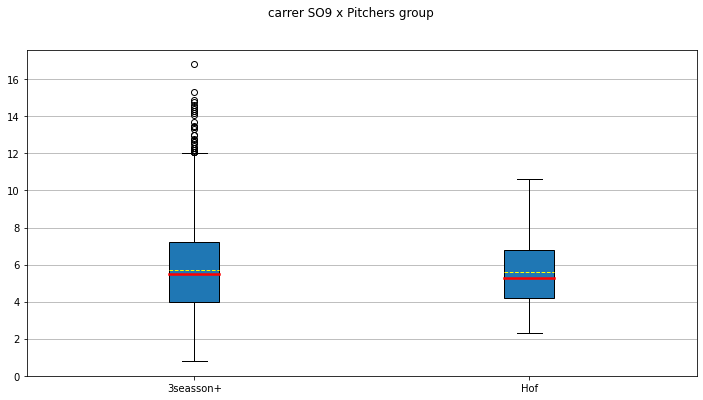

In [90]:
pit_stat_comparision([all_pitchers, pitchers_more_2_seassons, pitcher_in_hall], "SO9", ['All', '3seasson+', 'Hof'], "carrer SO9 x Pitchers group")
pit_stat_comparision([pitchers_more_2_seassons, pitcher_in_hall], "SO9", ['3seasson+', 'Hof'], "carrer SO9 x Pitchers group")
